<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

In [2]:
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df['WorkLoc'].replace(np.nan, "Office", inplace=True)


In [6]:
def normalized_compensation(row):
    if row["CompFreq"] == "Yearly":
        return row["CompTotal"]
    elif row["CompFreq"] == "Monthly":
        return row["CompTotal"] * 12
    elif row["CompFreq"] == "Weekly":
        return row["CompTotal"] * 52
    else:
        return 0
    
df['NormalizedAnnualCompensation']=df.apply(normalized_compensation, axis=1)

y=df['NormalizedAnnualCompensation']
print(y)

0         61000.0
1        138000.0
2         90000.0
3        348000.0
4         90000.0
           ...   
11393    130000.0
11394     74400.0
11395    105000.0
11396     80000.0
11397         0.0
Name: NormalizedAnnualCompensation, Length: 11398, dtype: float64


In [7]:
df['NormalizedAnnualCompensation'].median()
df['NormalizedAnnualCompensation'].replace(0,98000,inplace=True)

In [8]:
y=df['NormalizedAnnualCompensation']
print(y)
##All blank data cells has been replaced with the median##

0         61000.0
1        138000.0
2         90000.0
3        348000.0
4         90000.0
           ...   
11393    130000.0
11394     74400.0
11395    105000.0
11396     80000.0
11397     98000.0
Name: NormalizedAnnualCompensation, Length: 11398, dtype: float64


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

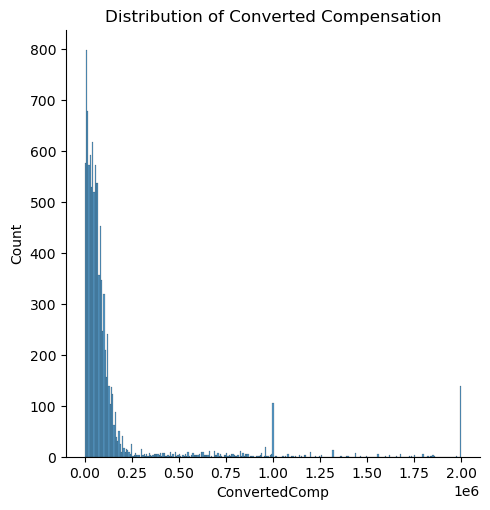

In [10]:
# your code goes here

sns.displot(df['ConvertedComp'])
plt.title('Distribution of Converted Compensation')

plt.show

Plot the histogram for the column `ConvertedComp`.


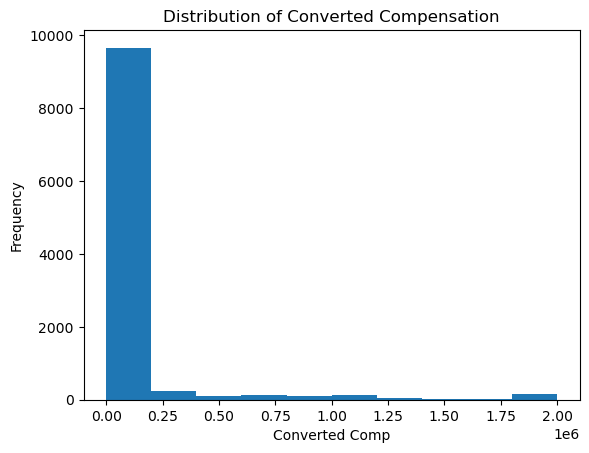

In [11]:
# your code goes here
plt.hist(df['ConvertedComp'])

plt.title('Distribution of Converted Compensation')
plt.ylabel('Frequency')
plt.xlabel('Converted Comp')

plt.show()

What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df['Gender'].value_counts()


Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
#Isolate Women Respondents to a variable
Woman_respond=df[df["Gender"]=="Woman"]
Medianwoman = Woman_respond['ConvertedComp'].median()

Medianwoman

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


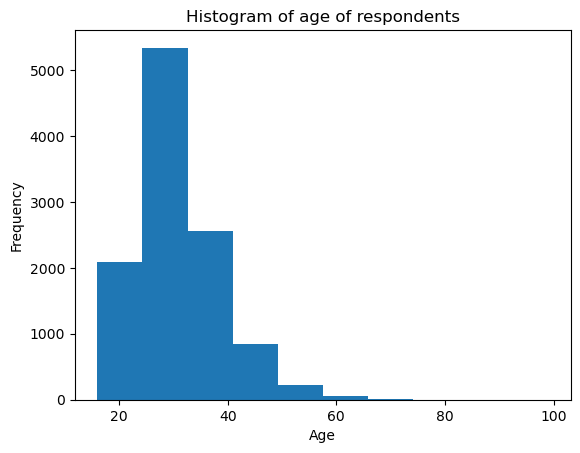

In [16]:
# your code goes here
plt.hist(df['Age'])

plt.title("Histogram of age of respondents")
plt.ylabel('Frequency')
plt.xlabel('Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


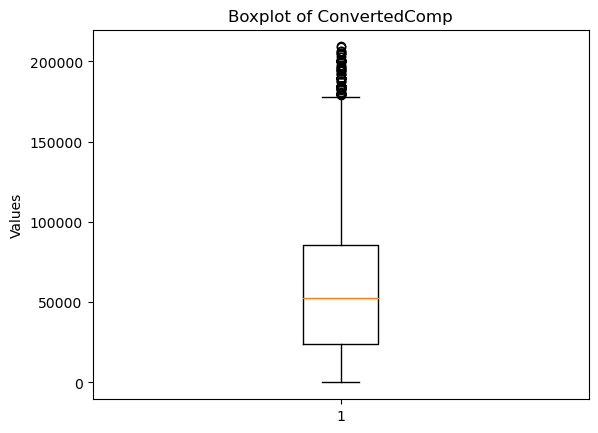

In [38]:
# your code goes here

data_convertedcomp = df['ConvertedComp'].dropna()

plt.boxplot(data_convertedcomp)
plt.title('Boxplot of ConvertedComp')
plt.ylabel('Values')
plt.show()


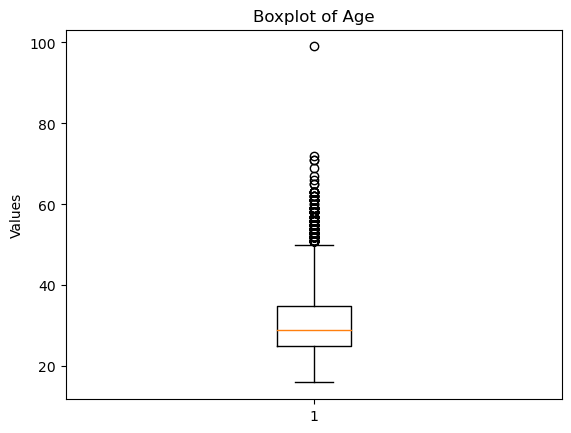

In [39]:

data_age = df['Age'].dropna()

plt.boxplot(data_age)
plt.title('Boxplot of Age')
plt.ylabel('Values')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [27]:
# your code goes here
sorted_convertedcomp = data_convertedcomp.sort_values()


q1 = sorted_convertedcomp.quantile(0.25)
q3 = sorted_convertedcomp.quantile(0.75)

iqr_convertedcomp= q3-q1

print("The interquartile range for ConvertedComp =", iqr_convertedcomp)

The interquartile range for ConvertedComp = 73132.0


Find out the upper and lower bounds.


In [26]:
# your code goes here
lower_bound = q1 - 1.5 * iqr_convertedcomp
print('The lower bound of ConvertedComp =', lower_bound)

upper_bound = q3 + 1.5 * iqr_convertedcomp
print('The upper bound of ConvertedComp =', upper_bound)


The lower bound of ConvertedComp = -82830.0
The upper bound of ConvertedComp = 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [30]:
# your code goes here
outliers_convertedcomp = np.logical_or(sorted_convertedcomp < lower_bound, sorted_convertedcomp > upper_bound)
total_outliers_convertedcomp=outliers_convertedcomp.sum()
print("The total number of outliers for convertedcomp =", total_outliers_convertedcomp)

The total number of outliers for convertedcomp = 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [41]:
# your code goes here
df['ConvertedComp'] = df['ConvertedComp'].where(~outliers_convertedcomp)

##MEDIAN AFTER REMOVING OUTLIERS
df['ConvertedComp'].median()


52704.0

## Correlation


In [42]:
df['ConvertedComp'].mean()


59883.20838915799

### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [35]:
# your code goes here
df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,-0.013490,0.010878,-0.015314,0.004621,0.004041,0.000425
CompTotal,-0.013490,1.000000,-0.063561,0.003510,0.007063,0.006970,0.863224
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821,-0.086289
WorkWeekHrs,-0.015314,0.003510,0.034351,1.000000,0.026517,0.036518,0.005505
CodeRevHrs,0.004621,0.007063,-0.088934,0.026517,1.000000,-0.020469,0.012169
Age,0.004041,0.006970,0.401821,0.036518,-0.020469,1.000000,-0.005204
NormalizedAnnualCompensation,0.000425,0.863224,-0.086289,0.005505,0.012169,-0.005204,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
